### Image Transformation on baboon.png (RGB)

In [2]:
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt

### Load the RGB image baboon.png.

In [4]:
img_cv = cv2.imread(r"C:\Users\bbuser\OneDrive\Pictures\baboon.png")
print(f"OpenCV image dtype: {img_cv.dtype}, shape: {img_cv.shape}, mode")


OpenCV image dtype: uint8, shape: (512, 512, 3), mode


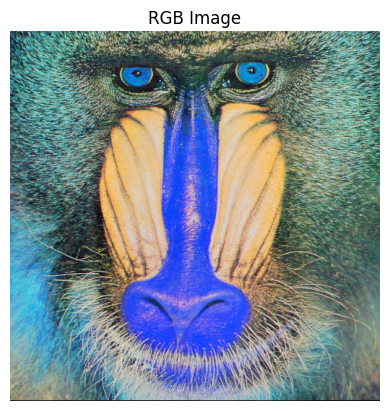

In [5]:
plt.imshow(img_cv)
plt.title('RGB Image')
plt.axis('off') #hide for cleaner display
plt.show()

### Create and display histograms for each color channel (Red, Green, Blue).

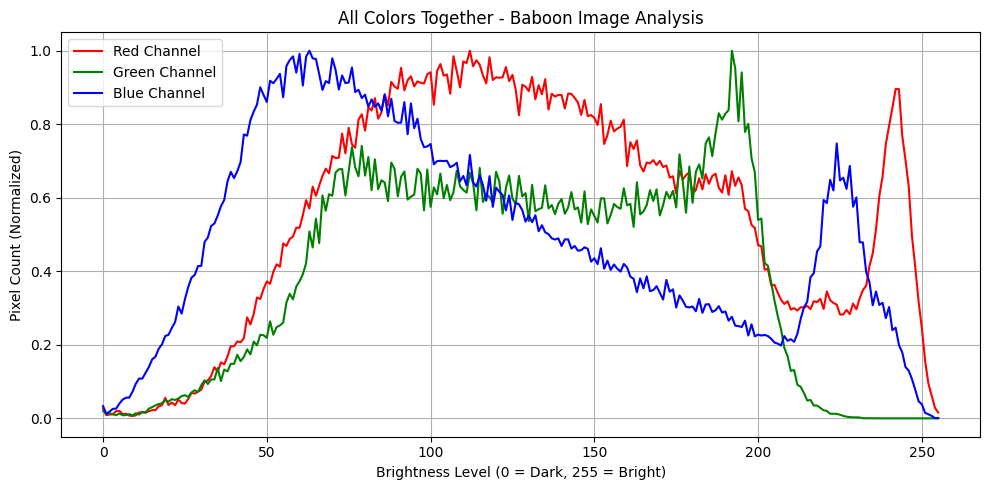

In [9]:
#calling out the image 
img = cv2.imread(r"C:\Users\bbuser\OneDrive\Pictures\baboon.png")

# covert BRG TO RGB  for correct colors 
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # ITS CONVERTED TO (BLUE, GREEN, RED)
#SPLIT TO SPRATE COLOR CHANNEL 


red, green , blue = cv2. split(img_rgb) #were getting r, g, b speratly 
#claculate histograms for each colors (were counting intensity) 
red_hist = cv2.calcHist([red], [0], None, [256], [0, 256])    # Red histogram
green_hist = cv2.calcHist([green], [0], None, [256], [0, 256])  # Green histogram  
blue_hist = cv2.calcHist([blue], [0], None, [256], [0, 256])   # Blue histogram

# normalize histogram ( make em 0-1 scale for an easy comparision) 
red_norm = red_hist/ red_hist.max() #normalize red
green_norm = green_hist/ green_hist.max() #normalize green
blue_norm = blue_hist/ blue_hist.max() #normalize blue

#plotting them all together 
# Plot normalized RGB histograms together
plt.figure(figsize=(10, 5))
plt.plot(red_norm, color='red', label='Red Channel')      # أحمر
plt.plot(green_norm, color='green', label='Green Channel')  # أخضر
plt.plot(blue_norm, color='blue', label='Blue Channel')    # أزرق

plt.title('All Colors Together - Baboon Image Analysis')
plt.xlabel('Brightness Level (0 = Dark, 255 = Bright)')
plt.ylabel('Pixel Count (Normalized)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### Apply intensity transformations to enhance image contrast and brightness.

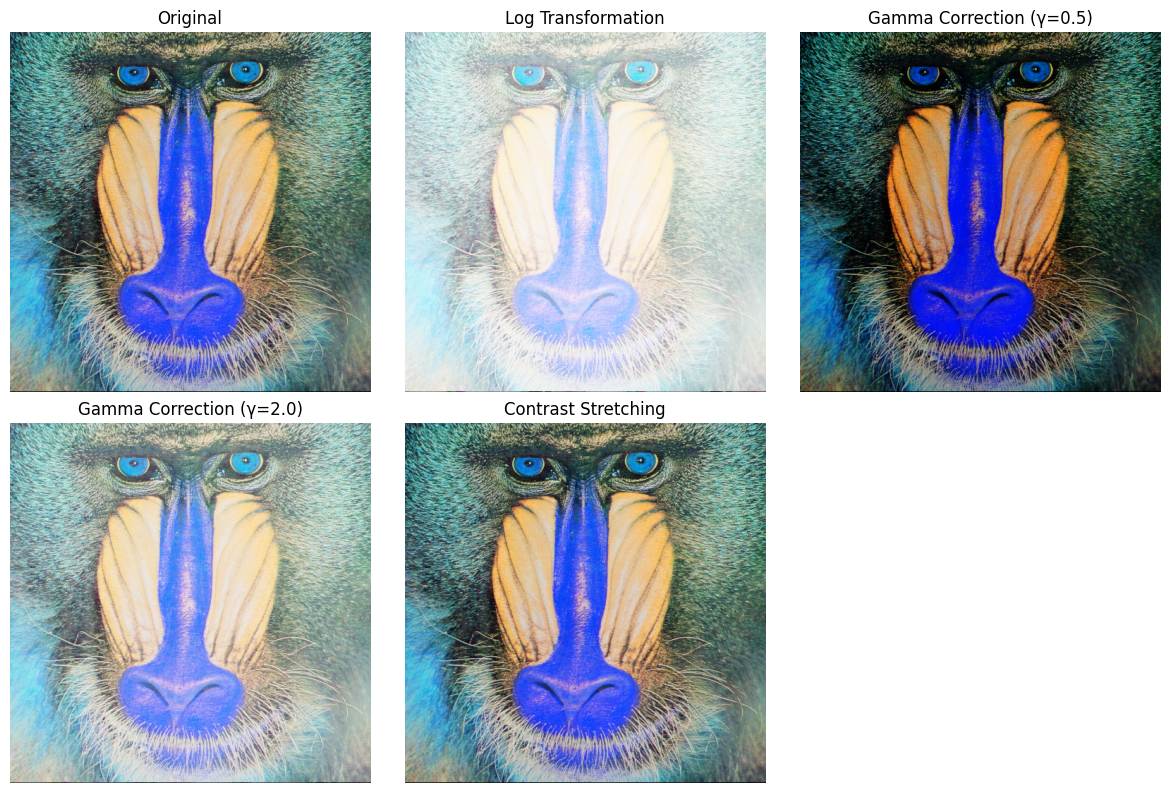

In [11]:
#calling out the image 
img = cv2.imread(r"C:\Users\bbuser\OneDrive\Pictures\baboon.png")
# numiro uno 
# Converting image to float and apply log transform
img_float = img.astype(np.float32)
log_transformed = cv2.normalize(np.log1p(img_float), None, 0, 255, cv2.NORM_MINMAX)
log_transformed = np.uint8(log_transformed)

#dos
#Gamma Correction
def gamma_correction(image, gamma):
    inv_gamma = 1.0 / gamma
    table = np.array([(i / 255.0) ** inv_gamma * 255 for i in range(256)]).astype("uint8")
    return cv2.LUT(image, table)

# Apply with two different gamma values
gamma_low = gamma_correction(img, 0.5)   # Brighter
gamma_high = gamma_correction(img, 2.0)  # Darker

#tres
#constract streching 
# Define min and max
in_min, in_max = np.min(img), np.max(img)

# Contrast stretching
contrast_stretched = ((img - in_min) / (in_max - in_min) * 255).astype('uint8')

#we are done now we display all rwsults togethwer
plt.figure(figsize=(12, 8))

plt.subplot(2, 3, 1)
plt.imshow(img, cmap='gray')
plt.title('Original')
plt.axis('off')

plt.subplot(2, 3, 2)
plt.imshow(log_transformed, cmap='gray')
plt.title('Log Transformation')
plt.axis('off')

plt.subplot(2, 3, 3)
plt.imshow(gamma_low, cmap='gray')
plt.title('Gamma Correction (γ=0.5)')
plt.axis('off')

plt.subplot(2, 3, 4)
plt.imshow(gamma_high, cmap='gray')
plt.title('Gamma Correction (γ=2.0)')
plt.axis('off')

plt.subplot(2, 3, 5)
plt.imshow(contrast_stretched, cmap='gray')
plt.title('Contrast Stretching')
plt.axis('off')

plt.tight_layout()
plt.show()





### Adjust brightness and contrast with chosen transformation functions.

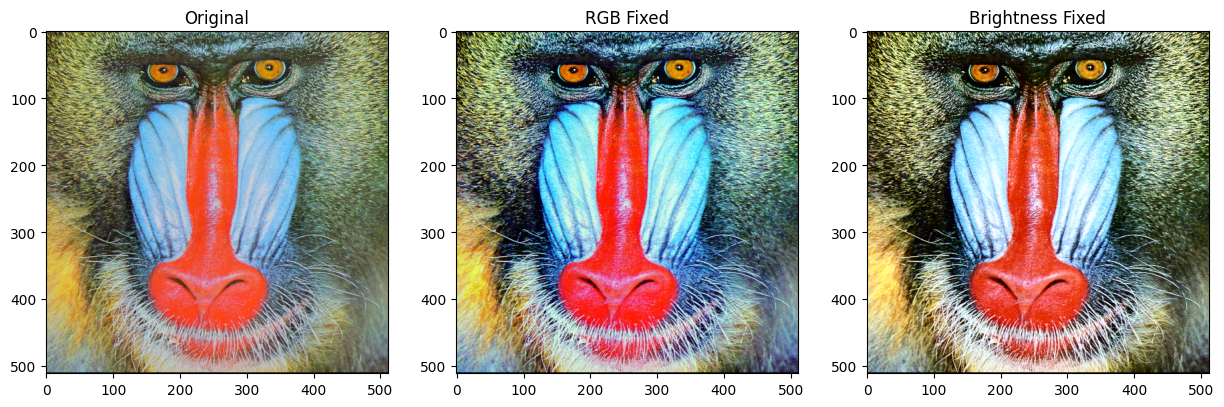

In [12]:
#calling out the image 
img2 = cv2.imread(r"C:\Users\bbuser\OneDrive\Pictures\baboon.png")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# METHOD 1: Fix each color separately
red, green, blue = cv2.split(img)

# Make each color better
red_fixed = cv2.equalizeHist(red)
green_fixed = cv2.equalizeHist(green)
blue_fixed = cv2.equalizeHist(blue)

# Put colors back together
rgb_fixed = cv2.merge([red_fixed, green_fixed, blue_fixed])

# METHOD 2: Fix brightness only, keep colors same
# Convert to YCrCb (Y=brightness, Cr=red-ish, Cb=blue-ish)
ycrcb = cv2.cvtColor(img, cv2.COLOR_RGB2YCrCb)
y, cr, cb = cv2.split(ycrcb)

# Fix only brightness
y_fixed = cv2.equalizeHist(y)

# Put back together
ycrcb_fixed = cv2.merge([y_fixed, cr, cb])
brightness_fixed = cv2.cvtColor(ycrcb_fixed, cv2.COLOR_YCrCb2RGB)

# Show results
plt.figure(figsize=(15, 5))

# Original
plt.subplot(1, 3, 1)
plt.imshow(img)
plt.title('Original')

# RGB fixed
plt.subplot(1, 3, 2)
plt.imshow(rgb_fixed)
plt.title('RGB Fixed')

# Brightness fixed
plt.subplot(1, 3, 3)
plt.imshow(brightness_fixed)
plt.title('Brightness Fixed')

plt.show()

### Perform histogram equalization on each channel.

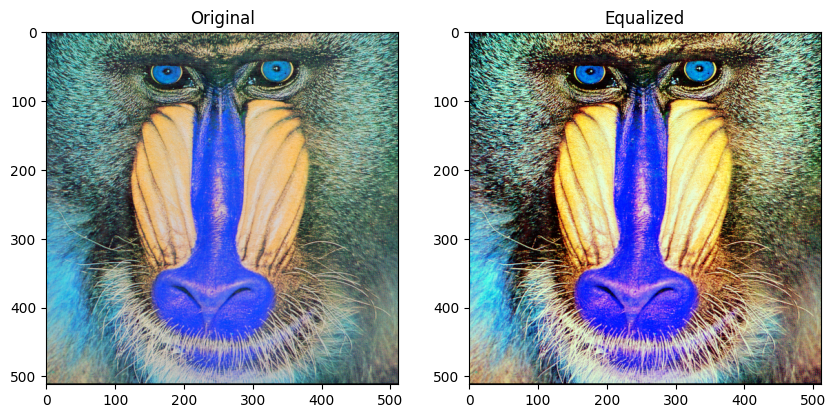

In [13]:
# Load image
img2 = cv2.imread(r"C:\Users\bbuser\OneDrive\Pictures\baboon.png")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Split into R, G, B channels
red, green, blue = cv2.split(img)

# Equalize each channel
red_eq = cv2.equalizeHist(red)
green_eq = cv2.equalizeHist(green)
blue_eq = cv2.equalizeHist(blue)

# Put channels back together
img_equalized = cv2.merge([red_eq, green_eq, blue_eq])

# Show before and after
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(img)
plt.title('Original')

plt.subplot(1, 2, 2)
plt.imshow(img_equalized)
plt.title('Equalized')

plt.show()

### 1.Convert the image to grayscale and create its histogram
### 2. Apply Otsu’s thresholding 

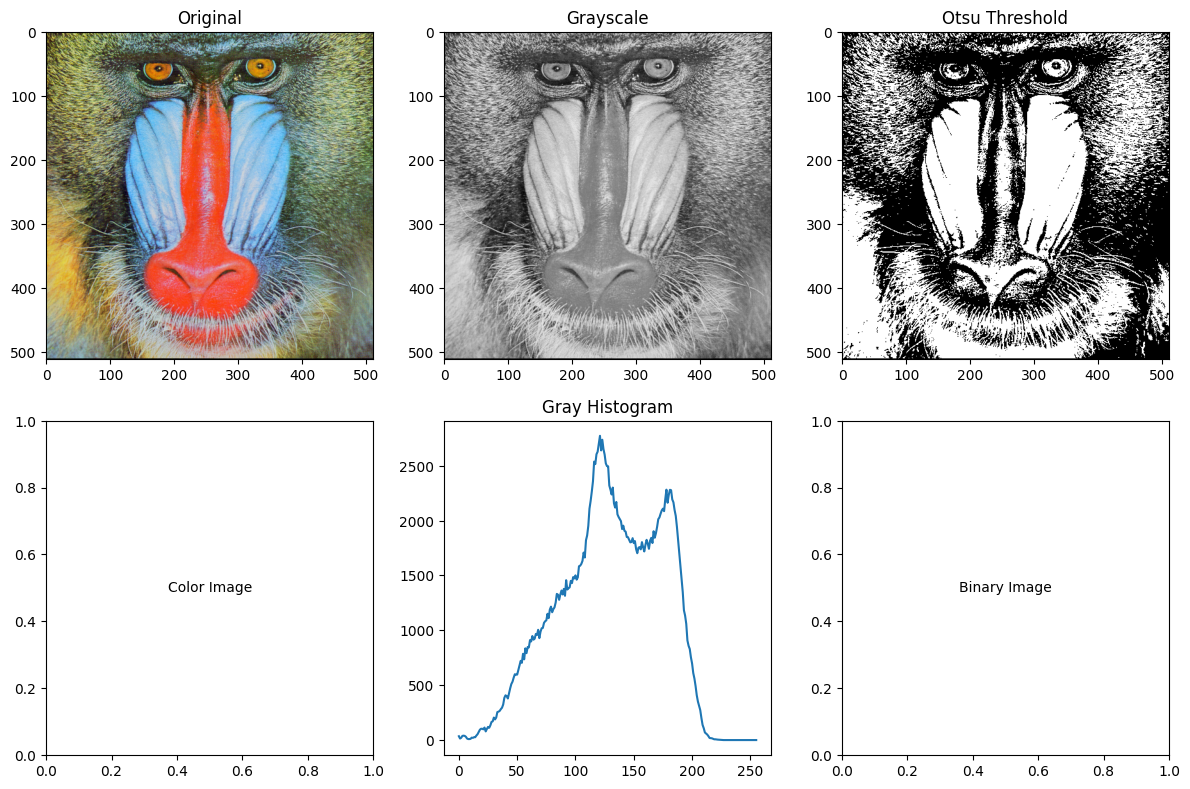

In [18]:
# Load image
img2 = cv2.imread(r"C:\Users\bbuser\OneDrive\Pictures\baboon.png")
img_rgb = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)  

# 1. Convert to grayscale
gray = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2GRAY)

# Make histogram
hist = cv2.calcHist([gray], [0], None, [256], [0, 256])

# 2. Apply Otsu's thresholding
_, otsu = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)  # Fixed: _ not *, THRESH_BINARY not THRESH*BINARY

# 3. Display results
plt.figure(figsize=(12, 8))

# Row 1: Images
plt.subplot(2, 3, 1)
plt.imshow(img_rgb)
plt.title('Original')

plt.subplot(2, 3, 2)
plt.imshow(gray, cmap='gray')
plt.title('Grayscale')

plt.subplot(2, 3, 3)
plt.imshow(otsu, cmap='gray')
plt.title('Otsu Threshold')

# Row 2: Histograms
plt.subplot(2, 3, 4)
plt.text(0.5, 0.5, 'Color Image', ha='center', va='center', transform=plt.gca().transAxes)

plt.subplot(2, 3, 5)
plt.plot(hist)
plt.title('Gray Histogram')

plt.subplot(2, 3, 6)
plt.text(0.5, 0.5, 'Binary Image', ha='center', va='center', transform=plt.gca().transAxes)

plt.tight_layout()
plt.show()